<a href="https://colab.research.google.com/github/Sazocar-P/Molecular_docking_AKT_QUE/blob/main/Molecular_Docking_Analysis_AKT17_QUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spyrmsd
!pip install rdkit-pypi
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -q -y -c conda-forge openbabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.0 MB/s eta 0:00:00
⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openbabel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    cairo-1.18.2               |       h3394656_1         956 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    font-ttf-dejavu-sans-mono-2.

In [ ]:
import spyrmsd.io as io
import spyrmsd.rmsd as rmsd
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem import AllChem, Draw
#import openbabel as ob
pd.set_option('display.max_rows', None)

archivo_sdf = '/content/ligand_library_6buu.sdf'

mols = io.loadallmols(archivo_sdf)


valores_rmsd = pd.DataFrame(index=range(len(mols)), columns=range(len(mols)))


for i, mol1 in enumerate(mols):
    mol1.strip()
    coords1 = mol1.coordinates
    anum1 = mol1.atomicnums
    adj1 = mol1.adjacency_matrix

    for j, mol2 in enumerate(mols):
        mol2.strip()
        coords2 = mol2.coordinates
        anum2 = mol2.atomicnums
        adj2 = mol2.adjacency_matrix


        rmsd_value = rmsd.symmrmsd(
            coords1,
            coords2,
            anum1,
            anum2,
            adj1,
            adj2
        )


        valores_rmsd.iloc[i, j] = rmsd_value

print(valores_rmsd)


          0          1          2         3          4          5          6   \
0        0.0   9.447269   8.607717   1.45692   7.323487   7.075487   8.117081   
1   9.447269        0.0   6.885912  9.440168   6.831973   6.808096     5.2505   
2   8.607717   6.885912        0.0  8.379464   3.327661   3.682547   6.731968   
3    1.45692   9.440168   8.379464       0.0   7.063238   7.011489   8.272543   
4   7.323487   6.831973   3.327661  7.063238        0.0   1.405838   7.086108   
5   7.075487   6.808096   3.682547  7.011489   1.405838        0.0    7.01411   
6   8.117081     5.2505   6.731968  8.272543   7.086108    7.01411        0.0   
7   7.018145    8.99203   7.542302  6.836638   7.343484   7.423618   5.957346   
8     7.0139  13.120402  12.514913  7.196362  11.755528  11.646875  10.856821   
9    0.02347    9.43906   8.608279   1.45742   7.326402   7.078527   8.112088   
10  9.446402   0.003023   6.886048  9.439274   6.832587   6.808566   5.249663   
11  8.566357   6.894971   0.

In [ ]:
valores_rmsd

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.0,9.447269,8.607717,1.45692,7.323487,7.075487,8.117081,7.018145,7.0139,0.02347,...,7.018199,0.057794,9.445861,8.558362,7.314931,8.303908,7.025682,7.057613,7.014019,6.849903
1,9.447269,0.0,6.885912,9.440168,6.831973,6.808096,5.2505,8.99203,13.120402,9.43906,...,13.121354,9.460088,0.021957,6.893042,6.831981,5.445559,8.963304,13.170508,10.957714,13.169864
2,8.607717,6.885912,0.0,8.379464,3.327661,3.682547,6.731968,7.542302,12.514913,8.608279,...,12.516491,8.631925,6.890712,0.071306,3.331757,6.660982,7.527891,12.563863,8.699347,10.441253
3,1.45692,9.440168,8.379464,0.0,7.063238,7.011489,8.272543,6.836638,7.196362,1.45742,...,7.200658,1.45477,9.439257,8.328652,7.054791,8.461273,6.844014,7.239549,7.013408,6.602792
4,7.323487,6.831973,3.327661,7.063238,0.0,1.405838,7.086108,7.343484,11.755528,7.326402,...,11.75814,7.350433,6.84004,3.294056,0.016878,7.098104,7.322493,11.809372,8.883713,10.144711
5,7.075487,6.808096,3.682547,7.011489,1.405838,0.0,7.01411,7.423618,11.646875,7.078527,...,11.649612,7.103647,6.815721,3.649311,1.40354,7.0961,7.402972,11.701205,8.7855,10.15789
6,8.117081,5.2505,6.731968,8.272543,7.086108,7.01411,0.0,5.957346,10.856821,8.112088,...,10.858221,8.12865,5.237673,6.725514,7.085215,1.427737,5.932719,10.894487,7.717854,10.756248
7,7.018145,8.99203,7.542302,6.836638,7.343484,7.423618,5.957346,0.0,8.602359,7.013109,...,8.604433,7.018334,8.982491,7.533285,7.345538,5.983293,0.060535,8.628418,3.835989,7.248439
8,7.0139,13.120402,12.514913,7.196362,11.755528,11.646875,10.856821,8.602359,0.0,7.005768,...,0.008372,6.990415,13.113056,12.479449,11.750204,11.085827,8.61871,0.065678,7.268628,6.939126
9,0.02347,9.43906,8.608279,1.45742,7.326402,7.078527,8.112088,7.013109,7.005768,0.0,...,7.010051,0.058548,9.437623,8.558985,7.317873,8.298986,7.020574,7.049505,7.013496,6.844178


In [ ]:
valores_rmsd.to_excel('/content/resultado_rmsd.xlsx')

In [ ]:
pip install numpy

<ipython-input-9-7164f09c0d1d>:10: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matriz_rmsd, 'ward')


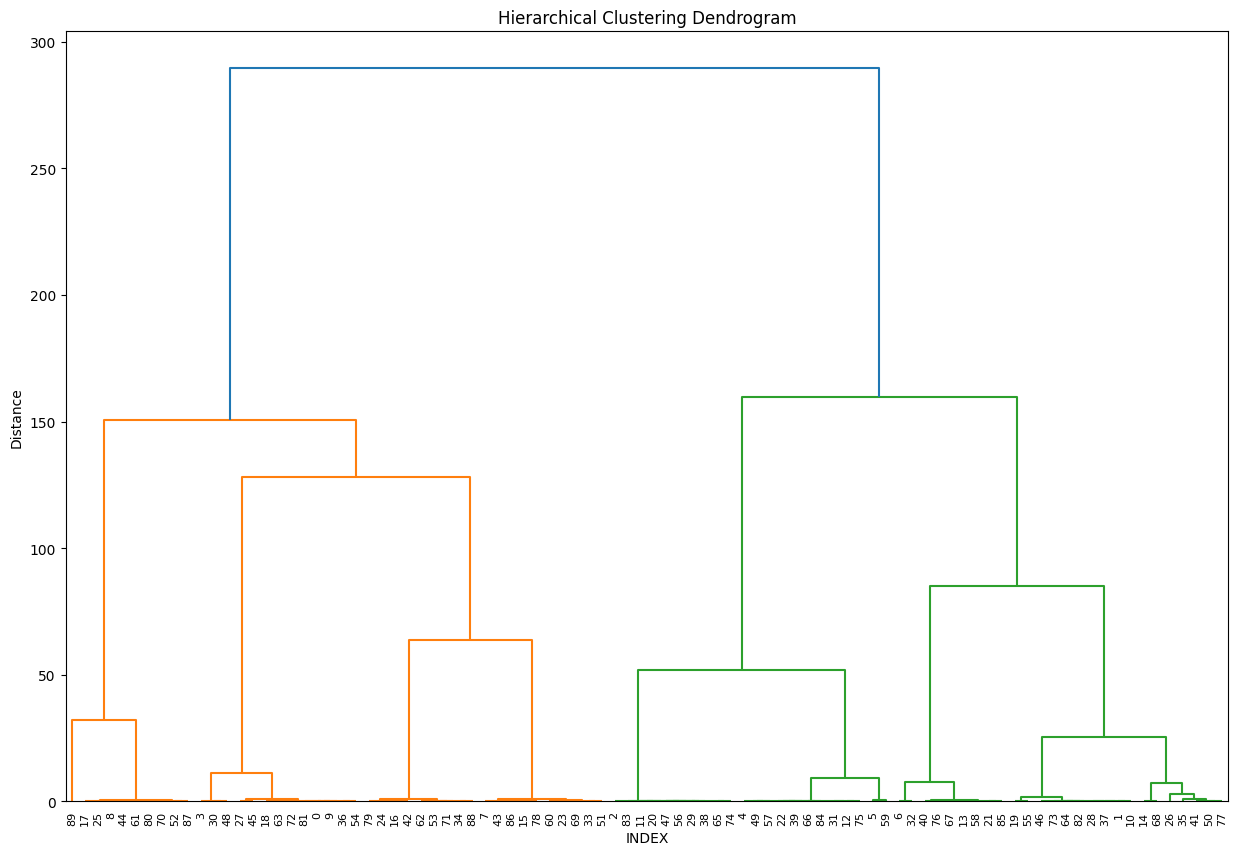

In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data = pd.read_excel("/content/resultado_rmsd.xlsx", index_col=0)

matriz_rmsd = data.to_numpy()

Z = linkage(matriz_rmsd, 'ward')


plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('INDEX')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.savefig('/content/dendogram_clusters_docking.svg')
plt.savefig('/content/dendogram_clusters_docking.png')
plt.show()

In [ ]:
pip install dendrogram-ts

  Using cached dendrogram_ts-0.1.2.tar.gz (5.3 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<ipython-input-10-5b34e4261980>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  representativos = data.groupby('Cluster').apply(lambda x: x.sub(centroides.loc[x.name]).pow(2).sum(1).idxmin())


         Index  Cluster  Population
Cluster                            
1           17        1          10
2           45        2          13
3            7        3          19
4            5        4          22
5           14        5          26


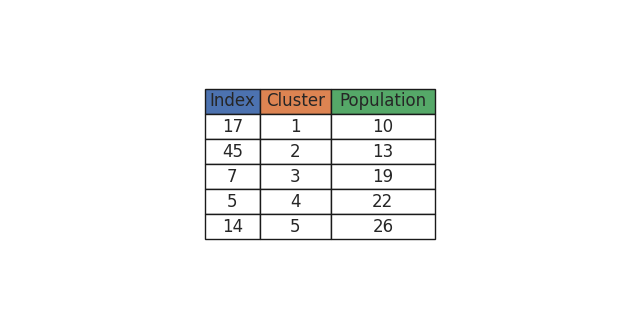

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster


umbral_distancia = 100

clusters = fcluster(Z, umbral_distancia, criterion='distance')

data['Cluster'] = clusters

centroides = data.groupby('Cluster').mean()

representativos = data.groupby('Cluster').apply(lambda x: x.sub(centroides.loc[x.name]).pow(2).sum(1).idxmin())

df_representativos = pd.DataFrame(representativos, columns=['Index'])

poblacion_clusters = data['Cluster'].value_counts()

df_representativos['Cluster'] = df_representativos['Index'].map(data['Cluster'])
df_representativos['Population'] = df_representativos['Cluster'].map(poblacion_clusters)

print(df_representativos)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, len(df_representativos) * 0.6 + 1))
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

tabla = plt.table(cellText=df_representativos.values,
                  colLabels=df_representativos.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=["#4c72b0", "#dd8452", "#55a868"])

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

for i in range(len(df_representativos.columns)):
    tabla.auto_set_column_width(i)

tabla.scale(1.2, 1.5)

plt.savefig("representativos.png", dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("representativos.svg", bbox_inches='tight', transparent=True)

plt.show()